<img src="https://docs.actable.ai/_images/logo.png" style="object-fit: cover; max-width:100%; height:300px;" />

# AAIClusteringTask

This notebook is an example on how you can run a clustering analysis with
[Actable AI](https://actable.ai)

For this example we will segment flowers into different groups based on\
features.

For this example the dataset we are going to use is the famous [Iris dataset](https://archive.ics.uci.edu/ml/datasets/iris)

### Imports

This part simply imports the python modules.
Last line imports the ClassificationTask from actableai

In [3]:
import ray
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from actableai.tasks.clustering import AAIClusteringTask

### Importing the data

This part imports the data.

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/Actable-AI/public-datasets/master/iris.csv")

### Calling Actable AI task

This part is the call to the ActableAI clustering analysis.\
To learn more about the available parameters you can consult the [API Documentation](https://lib.actable.ai/actableai.tasks.html#actableai.tasks.clustering.AAIClusteringTask.run)

In [ ]:
result = AAIClusteringTask().run(
    df[["SepalLengthCm", "SepalWidthCm", "PetalWidthCm"]],
    num_clusters="auto", alpha_k=0.02, explain_samples=True)

100.00% of samples that satisfy SepalWidthCm > 3.45 and PetalWidthCm <= 0.80 belong to this cluster.
[10.41500854 -0.02237438]
100.00% of samples that satisfy SepalWidthCm <= 3.45 and PetalWidthCm <= 0.80 belong to this cluster.
[11.86870684  0.95961059]
100.00% of samples that satisfy SepalLengthCm <= 6.75, SepalLengthCm > 5.85, SepalWidthCm > 2.75, PetalWidthCm <= 1.75 and PetalWidthCm > 1.65 belong to this cluster.
100.00% of samples that satisfy SepalLengthCm <= 6.75, SepalLengthCm > 6.60, PetalWidthCm <= 2.20 and PetalWidthCm > 1.75 belong to this cluster.
100.00% of samples that satisfy SepalLengthCm > 6.75 and PetalWidthCm > 0.80 belong to this cluster.
[-6.60247288  3.33563916]
100.00% of samples that satisfy SepalLengthCm <= 6.75, SepalLengthCm > 5.85, SepalWidthCm <= 2.75, PetalWidthCm <= 1.45 and PetalWidthCm > 1.15 belong to this cluster.
94.44% of samples that satisfy SepalLengthCm <= 6.75, SepalLengthCm > 5.85, SepalWidthCm > 2.75, PetalWidthCm <= 1.75 and PetalWidthCm > 

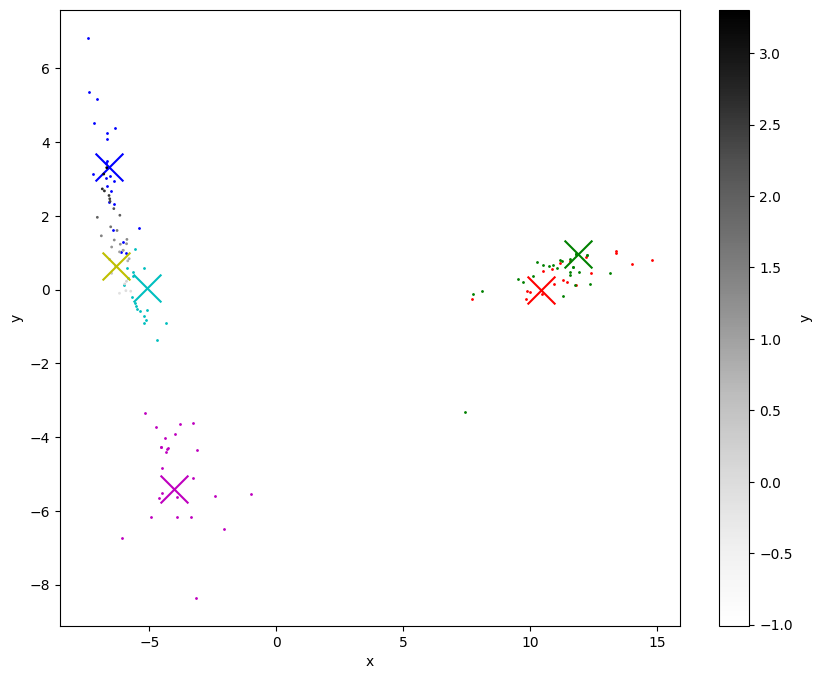

In [6]:
fig, ax = plt.subplots(figsize=(10, 8))
for cluster, c in zip(result["data"], ["r", "g", "b", "c", "m", "y"]):
    pd.DataFrame([d["train"] for d in cluster["value"]]).plot.scatter(x="x", y="y", ax=ax, c=c, s=1)
    ax.scatter([cluster["projected_nearest_point"][0]], [cluster["projected_nearest_point"][1]], c=c, marker="x", s=400)
    print(cluster["explanation"])
    print(cluster["projected_nearest_point"])
